# Title : Guided Project: Classifying Heart Disease

## Step : 1 Data Exploration

* We'll be working with the Heart Disease Data Set from the UCI Machine Learning Repository, which contains patient information recorded by the Cleveland Clinic Foundation. 
* The goal is to classify the presence of heart disease based on various patient characteristics.

##### Dataset features: 
* age: age in years
* sex: sex 
* cp: chest pain type 
* trestbps: resting blood pressure
* chol: serum cholesterol in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) 
* restecg: resting electrocardiographic results 
* thalach: maximum heart rate achieved
* exang: exercise induced angina 
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment 
* ca: number of major vessels (0-3) coloured by fluoroscopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
* present: diagnosis of heart disease (angiographic disease status)

In [1]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Loading the dataset
heart = pd.read_csv('heart_disease.csv')

In [3]:
# First few rows of data
heart.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


#### checking missing value 

In [5]:
heart.isnull().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
present       0
dtype: int64

##### No missing values found in dataset.

In [6]:
heart['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [7]:
heart['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

##### Here, we can see that we have '?'(Questionable) values in two feature column values : 'ca' and 'thal'
##### We can drop that few rows

In [8]:
heart = heart[heart['ca'] != '?']

heart['ca'] = heart['ca'].astype('float')
heart['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [9]:
heart = heart.replace('?',pd.NA) # Convert '?' to NA values
heart.dropna(inplace=True) # Drop rows with NA values

In [10]:
print(heart['ca'].value_counts())
print(heart['thal'].value_counts())

0.0    174
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64
3.0    164
7.0    115
6.0     18
Name: thal, dtype: int64


In [11]:
heart.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,present
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,150.673401,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,0.461279
std,87.323283,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.499340
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,75.000000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,150.000000,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,226.000000,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,302.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


##### Observations:
* In this section, import necessary libraries and load the dataset.
* Handle missing values by dropping rows with "?" values in the "ca" column.
* Convert the "ca" column to a float type to ensure consistency in data types.
* Any rows with missing values after replacing "?" with "NA" are dropped from the dataset.

## Step : 2 Data Visualization

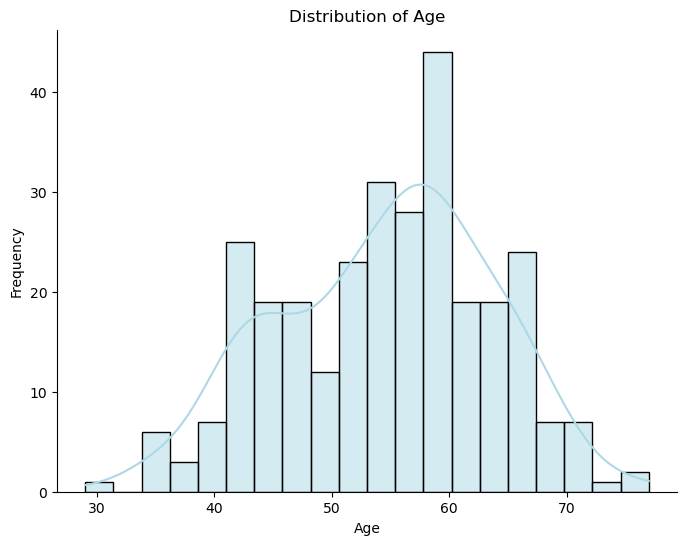

In [12]:
# Histogram of age
plt.figure(figsize=(8, 6))
sns.histplot(data=heart, x='age', bins=20, kde=True, color='lightblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
sns.despine()
plt.show()

#### Observation :
* Most individuals are middle-aged, with fewer younger and older individuals.

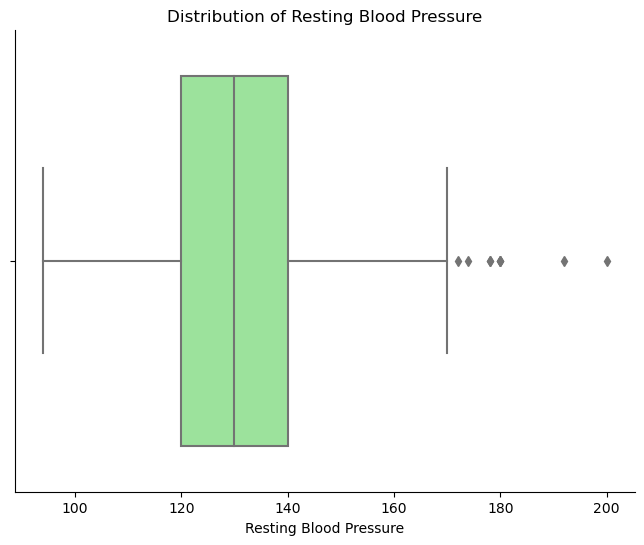

In [13]:
# Boxplot of trestbps (resting blood pressure)
plt.figure(figsize=(8, 6))
sns.boxplot(data=heart, x='trestbps', color='lightgreen')
plt.title('Distribution of Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure')
sns.despine()
plt.show()

#### Observation :
* Majority have normal resting blood pressure, with some outliers.

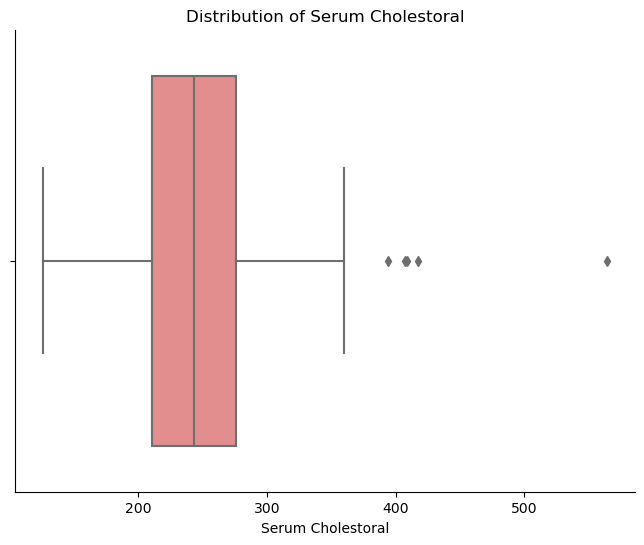

In [14]:
# Boxplot of chol (serum cholestoral)
plt.figure(figsize=(8, 6))
sns.boxplot(data=heart, x='chol', color='lightcoral')
plt.title('Distribution of Serum Cholestoral')
plt.xlabel('Serum Cholestoral')
sns.despine()
plt.show()

#### Observation :
* There are outliers indicating high serum cholestoral levels.

## Step : 3 Data Preparation

#### Dividing the data

In [15]:
# Split the data
X = heart.drop(columns='present',axis=1)
y = heart['present']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [17]:
y_train.value_counts(normalize=True)

0    0.523207
1    0.476793
Name: present, dtype: float64

In [18]:
y_test.value_counts(normalize=True)

0    0.6
1    0.4
Name: present, dtype: float64

##### Observations:
* The dataset is split into features (X) and the target variable (y) for model building.
* The data is further divided into traning nd test sets using a 80-20 split ration for evaluation.

#### Model Building

In [19]:
model = LogisticRegression()

In [20]:
# Fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
# Make predictions on the training data
y_pred = model.predict(X_train)

##### Observations:
* Logistic Regression is chosen as the classification algorithm for building the predictive model.
* The model is trained using the traning data.

#### Model Evaluation

In [22]:
# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_pred)

In [23]:
print(train_accuracy)

0.8481012658227848


In [24]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)
conf_matrix

array([[110,  14],
       [ 22,  91]])

In [25]:
# Calculate sensitivity and specificity
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

In [26]:
print("Traning Sensitivity:", sensitivity)
print("Traning Specificity:", specificity)

Traning Sensitivity: 0.8053097345132744
Traning Specificity: 0.8870967741935484


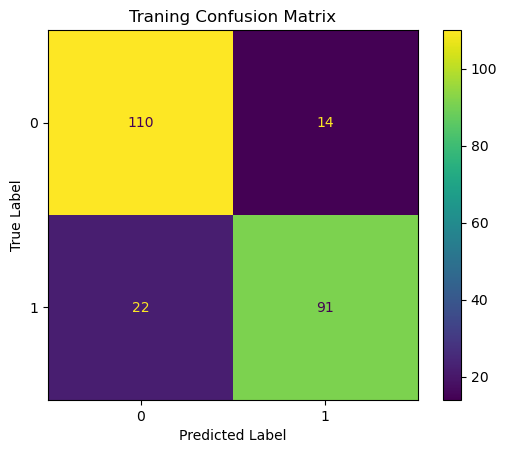

Traning Sensitivity: 0.8053097345132744
Traning Specificity: 0.8870967741935484


In [27]:
def conf_matrix(model, X, y, stage=None):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title('Traning Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    
    # sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    
    print(f"{stage} Sensitivity:", sensitivity)
    print(f"{stage} Specificity:", specificity)

conf_matrix(model, X_train, y_train, stage='Traning')


#### Interpreting the Model Coefficients

In [28]:
# Extracting the coefficients from the logistic regression model
coefficients = model.coef_[0]
intercept = model.intercept_[0]

In [29]:
odds_ratios = np.exp(coefficients)

In [30]:
df_coefficients = pd.DataFrame({'Predictor': X_train.columns, 
                                 'Log-Odds Coefficients': coefficients,
                                 'Odds Ratios': odds_ratios}).sort_values(by = 'Log-Odds Coefficients',ascending=False)

In [31]:
df_coefficients

,Predictor,Log-Odds Coefficients,Odds Ratios
12,ca,1.131665,3.100815
2,sex,0.756231,2.130232
9,exang,0.647575,1.910901
10,oldpeak,0.398732,1.489934
13,thal,0.364810,1.440240
3,cp,0.308819,1.361816
7,restecg,0.185336,1.203623
11,slope,0.037176,1.037875
4,trestbps,0.019663,1.019858
5,chol,0.004734,1.004745


#### Final Model Evaluation

In [32]:
test_accuracy = model.score(X_test, y_test)

In [33]:
print(f'Traning Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

Traning Accuracy: 0.8481012658227848
Test Accuracy: 0.8666666666666667


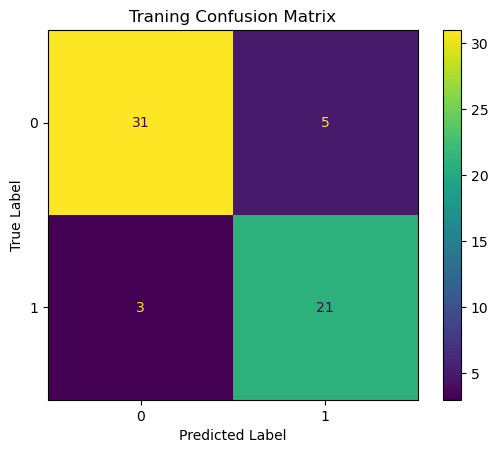

Test Sensitivity: 0.875
Test Specificity: 0.8611111111111112


In [34]:
conf_matrix(model, X_test, y_test, stage='Test')

##### Observations:
* The coefficients of the Logistic Regression model are extract to understand the impact of predictors on the target variable.
* Coefficients are converted to odds ratios for better interpretation.

##### Conclusions:
* The Logistic Regression model achieved high Sensitivity and Specificity in both traning and test datasets, indication its effectiveness in identifying positive and negative cases of Heart Disease.
* However, exploring alternative algorithms like Random Forest or Gradient Boosting may be beneficial to potentially improve accuracy, especially for handling nonlinear relationships in the data.